<a href="https://colab.research.google.com/github/tikhongc/fyp/blob/main/Music_genre_CreateDataset(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
# Install and update essential libraries and tools
!pip install xgboost -U
!pip install librosa -U
# !apt-get --yes install ffmpeg
!pip install hyperopt

In [ ]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import os
from tqdm import tqdm
import pickle


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import librosa

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV,mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

#For hyperparameter tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
import librosa 
import matplotlib.pyplot as plt
import librosa.display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import numpy
import skimage.io
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa.display as lplt
import librosa
import librosa.display
import IPython.display as ipd
import IPython
import warnings
warnings.filterwarnings('ignore')
import os

from librosa import feature
import csv
import glob

! pip install pydub
from pydub import AudioSegment

# About Audio

These are the code just for a reference,it contains:

1.   information about song
2.   diiferent audio features extrated from data and plot them



## Audio data

In [ ]:
general_path = '../content/drive/MyDrive/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

In [ ]:
# Importing 1 file
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00016.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
a=np.shape(y)
arr = np.asarray(a)
print(arr)
# Verify length of the audio
print('Check Len of Audio:',661794/22050)

In [ ]:
IPython.display.Audio(y, rate=sr)

In [ ]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
y, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', y, '\n')
print('Audio File shape:', np.shape(y))

In [ ]:
IPython.display.Audio(audio_file, rate=sr)

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in hiphop.00016", fontsize = 23);

## slice the audio

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00016.wav')
IPython.display.Audio(y, rate=sr)

In [ ]:
newAudio = AudioSegment.from_wav('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00016.wav')
ten_seconds = 10 * 1000 
first_10s = newAudio[:ten_seconds] 
mid_10s = newAudio[-20000:-10000]
last_10s = newAudio[-10000:]
first_10s.export('/content/drive/MyDrive/Data/newSong.wav', format="wav") #Exports to a wav file in the current path.
y, sr = librosa.load('/content/drive/MyDrive/Data/newSong.wav')
IPython.display.Audio(y, rate=sr)

## Audio Feature 
About features that get from an audio. Take it as a reference and a tool box.
Not using these code in my project.

reference : https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [ ]:
audio_file, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00016.wav')

### Zero Crossing Rate
the rate at which the signal changes from positive to negative or back.

In [ ]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

### Harmonics and Perceptrual
將音頻時間序列分解為諧波和打擊樂成分。


Harmonics are characteristichs that human ears can't distinguish (represents the sound color)

Perceptrual understanding shock wave represents the sound rhythm and emotion

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

harm_mean = np.mean(y_harm.T,axis=0)
perc_mean = np.mean(y_perc.T,axis=0)
perc_mean

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');



### Tempo BMP (beats per minute)
Dynamic programming beat tracker.

In [ ]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

### Spectral Centroid¶

indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

### Mel-Frequency Cepstral Coefficients:

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features 
(usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

In [ ]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

In [ ]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

### Chroma Frequencies¶

Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

In [ ]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

In [ ]:
N_FFT = 2048
N_MELS = 128
HOP_LEN = 512
y, sfr = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00016.wav')

melSpec = librosa.feature.melspectrogram(y=y, sr=sfr, n_mels=N_MELS,hop_length=HOP_LEN, n_fft=N_FFT)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)

librosa.display.specshow(melSpec_dB)

#Creating Dataset

## cut the audio into different length

The dataset contains 30s length for each song.

I would like to cut the aduio into different segment (10s/track) .

And then lable them and save into a new file

In [ ]:
newAudio = AudioSegment.from_wav('/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/genres_original/hiphop/hiphop.00016.wav')
ten_seconds = 10 * 1000 
first_10s = newAudio[:ten_seconds] 
mid_10s = newAudio[-20000:-10000]
last_10s = newAudio[-10000:]
mid_10s.export('/content/drive/MyDrive/Data/newSong.wav', format="wav") #Exports to a wav file in the current path.
y, sr = librosa.load('/content/drive/MyDrive/Data/newSong.wav')
IPython.display.Audio(y, rate=sr)

In [ ]:
  A=[]
  filePath = '/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/genres_original/'
  length_x = ['first_10s','mid_10s','last_10s']
  ten_seconds = 10 * 1000 
  A=os.listdir(filePath)
  m=0
  for k in length_x:
    path_saved='/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/'+k+'/'
    print(path_saved)
    for i in A:
      source_path = os.path.abspath(filePath+i)
      target_path = os.path.abspath(path_saved+i) 
      if not os.path.exists(target_path):
        os.makedirs(target_path)
      if os.path.exists(source_path):
        B=[]
        B=os.listdir(source_path) 
        B.sort() #sort the loaded file
        folder=i+'/'
        pathAudio=filePath+folder
        files = librosa.util.find_files(pathAudio, ext=['wav']) 
        files = np.asarray(files)
        code = 0;
        for x in files:
          newAudio = AudioSegment.from_wav(x)
          if m==0 :
            # first_10s
            segment = newAudio[:ten_seconds] 
          if m==1 :
            # mid_10s
            segment = newAudio[-20000:-10000]
          if m==2 :
            # last_10s
            segment = newAudio[-10000:]

          audio_name = B[code]
          genre = audio_name.split(".")[0]
          audio = audio_name.split(".")[0]+'.'+audio_name.split(".")[1]
          segment.export(path_saved+genre+'/'+audio+'_'+k+'.wav', format="wav") #Exports to a wav file in the current path.
          code=code+1
    m=m+1
    print(" Export "+k+" audio file finished !")

### Test the splitted aduio

successful for splitting the audio !

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Data/genres_original/hiphop/hiphop.00016.wav')
IPython.display.Audio(y, rate=sr)

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/first_10s/hiphop/hiphop.00016_first_10s.wav')
IPython.display.Audio(y, rate=sr)

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/mid_10s/hiphop/hiphop.00016_mid_10s.wav')
IPython.display.Audio(y, rate=sr)

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/last_10s/hiphop/hiphop.00016_last_10s.wav')
IPython.display.Audio(y, rate=sr)

## mel-png-file

1.   use log-melspectrogram
2.   min-max scale to fit inside 8-bit range
3.   save as png file
4.   creating new folders and save them into different genre folders with gnere lable 



When computing an STFT, you compute the FFT for a number of short segments. These segments have the length n_fft. Usually these segments overlap (in order to avoid information loss), so the distance between two segments is often not n_fft, but something like n_fft/2. The name for this distance is hop_length. It is also defined in samples.

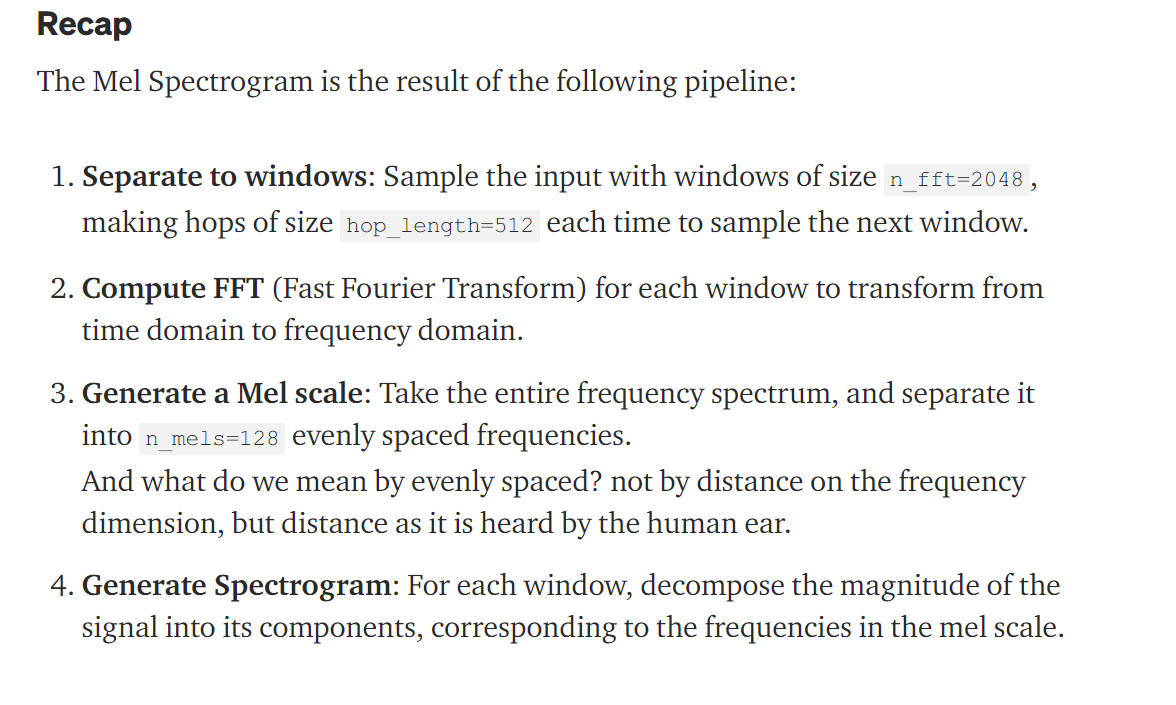

In [ ]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    # n_fft: 窗口大小
    # n_fft=hop_length+overlapping
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,n_fft=hop_length*2, hop_length=hop_length)

    
    mels = numpy.log(mels + 1e-9) # add small number to avoid log(0)
    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(numpy.uint8)
    img = numpy.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy
    # save as PNG
    skimage.io.imsave(out, img)

if __name__ == '__main__':
    # settings

    #两个相邻窗口之间错开的sample数
    hop_length = 512 # number of samples per time-step in spectrogram

    # number of bins in spectrogram. Height of image
    n_mels = 128 

    time_steps = 384 # number of time-steps. Width of image
   
    A=[]
    #filePath = '/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/genres_original/'
    #path_saved='/content/drive/MyDrive/Dataset/Music-genre-classification/mel-spec-img/All_30s/'
    #create png file for splitted audio
    filePath='/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/first_10s/'
    path_saved='/content/drive/MyDrive/Dataset/Music-genre-classification/mel-spec-img/first_10s/'
    
    length_aduio_csv='_10s'
    A=os.listdir(filePath)
    for i in A:
      source_path = os.path.abspath(filePath+i)
      target_path = os.path.abspath(path_saved+i) 
      if not os.path.exists(target_path):
        os.makedirs(target_path)
      if os.path.exists(source_path):
        B=[]
        B=os.listdir(source_path) 
        B.sort() #sort the loaded file
        folder=i+'/'
        pathAudio=filePath+folder
        files = librosa.util.find_files(pathAudio, ext=['wav']) 
        files = np.asarray(files)
        code = 0;

        for x in files: 
          y, sr = librosa.load(x)

          # Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
          y, _ = librosa.effects.trim(y)
          audio_name = B[code]
          genre = audio_name.split(".")[0]
          audio = audio_name.split(".")[0] + '.' + audio_name.split(".")[1]
          out = path_saved+folder+audio+'.png'
          code = code+1;

          # extract a fixed length window
          start_sample = 0 # starting at beginning
          length_samples = time_steps*hop_length
          window = y[start_sample:start_sample+length_samples]

          #convert to PNG
          spectrogram_image(y, sr=sr, out=out, hop_length=hop_length, n_mels=n_mels)
          print('wrote file', out)

    print('CREATEING DATASET FINISHED!')



##csv audio feature file
These files contains the mean and variance for each audio file fo the features analysed above.I take the value of these features and save them into csv file song by song:


---



*   audio name
*   genre
*   length
*   tempo
*   chroma_stft
*   chroma_cens
*   tonnetz
*   spectral_contrast
*   spectral_flatness
*   spectral_centroid
*   spectral_bandwidth
*   spectral_rolloff
*   RMS
*   zero_crossing_rate
*   MFCCs 1-13
*   I also want to take the harm_mean and perc_mean of audio, but it's too slow to run it on this platform


Extract features function

reference:
https://medium.com/@alexandro.ramr777/audio-files-to-dataset-by-feature-extraction-with-librosa-d87adafe5b64

**add new features:

 feature.chroma_cens,
 feature.spectral_contrast,
 feature.tonnetz
 feature.spectral_flatness

 and variance of every features** 

In [ ]:
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff,
 feature.chroma_cens,
 feature.spectral_contrast,
 feature.tonnetz
]
 
fn_list_ii = [
 feature.rms,
 feature.zero_crossing_rate,
 feature.spectral_flatness
]

 #'harm_mean',
 #'perc_mean',
 
header =[
 'audio_name',
 'genre',
 'length',
 'tempo',
 'chroma_stft_mean',
 'spectral_centroid_mean',
 'spectral_bandwidth_mean',
 'spectral_rolloff_mean',
 'chroma_cens_mean',
 'spectral_contrast_mean',
 'tonnetz_mean',
 'chroma_stft_var',
 'spectral_centroid_var',
 'spectral_bandwidth_var',
 'spectral_rolloff_var',
 'chroma_cens_var',
 'spectral_contrast_var',
 'tonnetz_var',
 'rms_mean',
 'zero_crossing_rate_mean',
 'spectral_flatness_mean',
 'rms_var',
 'zero_crossing_rate_var',
 'spectral_flatness_var',
 'mfcc1_mean',
 'mfcc2_mean',
 'mfcc3_mean',
 'mfcc4_mean',
 'mfcc5_mean',
 'mfcc6_mean',
 'mfcc7_mean',
 'mfcc8_mean',
 'mfcc9_mean',
 'mfcc10_mean',
 'mfcc11_mean',
 'mfcc12_mean',
 'mfcc13_mean',
  'mfcc1_var',
 'mfcc2_var',
 'mfcc3_var',
 'mfcc4_var',
 'mfcc5_var',
 'mfcc6_var',
 'mfcc7_var',
 'mfcc8_var',
 'mfcc9_var',
 'mfcc10_var',
 'mfcc11_var',
 'mfcc12_var',
 'mfcc13_var'
]

### method 1
make csv file one by one

In [ ]:
source_path = filePath = '/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/genres_original/blues'
norm_audio_files = glob(source_path + '*.wav')
norm_audios_feat = []
B=[]
B=os.listdir(source_path) 
B.sort() #sort the loaded file
code=0

def get_feature_vector(y,sr): 
   audio_name = B[code]
   genre = audio_name.split(".")[0]
   audio = audio_name.split(".")[0]+audio_name.split(".")[1]
   #calculate the length = shape / sampleling rate
   a=np.shape(y)
   arr = np.asarray(a)
   length = arr[0]/sr #

   feat_vect_i = [np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = [audio] + [genre]+ [length] + feat_vect_i + feat_vect_ii 
   return feature_vector

for file in norm_audio_files:
   y , sr = librosa.load(file,sr=None)
   feature_vector = get_feature_vector(y, sr)
   norm_audios_feat.append(feature_vector) 
   code=code+1;
   print(norm_audios_feat)

In [ ]:
norm_output = '/content/drive/MyDrive/Dataset/Music-genre-classification/csv_files/30_secd.csv'

with open(norm_output,'+w') as f:
 csv_writer = csv.writer(f, delimiter = ',')
 csv_writer.writerow(header)
 csv_writer.writerows(norm_audios_feat)


In [ ]:
csv_file= pd.read_csv('/content/drive/MyDrive/Data/normals_00.csv')
csv_file

### method 2:
make list at once, but too slow on platform

In [ ]:
    #directories of normal audios

    #30 sec audio file
    #filePath = '/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/genres_original/'
    #path_saved='/content/drive/MyDrive/Dataset/Music-genre-classification/csv_files/30_secd_audio/'
    norm_audios_feat = []
    A=[]
    B=[]
    code = 0
    #create csv file for splitted audio
    filePath='/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/genres_original/'
    path_saved='/content/drive/MyDrive/Dataset/Music-genre-classification/csv_files/new_30s/'
    A=os.listdir(filePath)
    
    length_aduio_csv='_30s'

    def extract_mfcc_features_mean(y,sr):
      mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
      mfccs_processed = np.mean(mfccs.T,axis=0)
      return mfccs_processed

    def extract_mfcc_features_var(y,sr):
      mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
      mfccs_processed = np.var(mfccs.T,axis=0)
      return mfccs_processed  

    def get_tempo(y,sr):
      onset_env = librosa.onset.onset_strength(y, sr=sr)
      tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
      tempo = np.array(tempo)
      return tempo

    def get_harm_mean(y,sr):
      y_harm, y_perc = librosa.effects.hpss(audio_file)
      harm_mean = np.mean(y_harm.T,axis=0)
      return harm_mean

    def get_perc_mean(y,sr):
      y_harm, y_perc = librosa.effects.hpss(audio_file)
      perc_mean = np.mean(y_perc.T,axis=0)
      return perc_mean



In [ ]:

def get_feature_vector(y,sr): 
       audio_name = B[code]
       genre = audio_name.split(".")[0]
       audio = audio_name.split(".")[0]+audio_name.split(".")[1]
       #calculate the length = shape / sampleling rate
       a=np.shape(y)
       arr = np.asarray(a)
       length = arr[0]/sr #
       #harm_mean = [get_harm_mean(y,sr)]
       #perc_mean = [get_perc_mean(y,sr)]
       feat_vect_i = [np.mean(funct(y,sr)) for funct in fn_list_i]
       feat_vect_ii = [np.mean(funct(y)) for funct in fn_list_ii]
       feat_vect_i_var = [np.var(funct(y,sr)) for funct in fn_list_i]
       feat_vect_ii_var = [np.var(funct(y)) for funct in fn_list_ii]
       tempo = get_tempo(y,sr)
       feat_tempo=[]
       for k in tempo :
         feat_tempo.append(k)
       feat_mfcc = extract_mfcc_features_mean(y,sr)
       features_mfcc=[]
       for i in feat_mfcc :
         features_mfcc.append(i)
       feat_mfcc2 = extract_mfcc_features_var(y,sr)   
       features_mfcc_var = []
       for i in feat_mfcc2 :
         features_mfcc_var.append(i)
       feature_vector = [audio] + [genre]+ [length] + feat_tempo +  feat_vect_i+feat_vect_i_var + feat_vect_ii +feat_vect_ii_var+ features_mfcc + features_mfcc_var
       return feature_vector            
       
for i in A:
      norm_audios_feat = []
      source_path = os.path.abspath(filePath+i)
      target_path = os.path.abspath(path_saved) 
      if not os.path.exists(target_path):
        os.makedirs(target_path)
      if os.path.exists(source_path):
        B=[]
        B=os.listdir(source_path) 
        B.sort() #sort the loaded file
        folder=i+'/'
        pathAudio=filePath+folder
        files = librosa.util.find_files(pathAudio, ext=['wav']) 
        files = np.asarray(files)
        code = 0
        for x in files: 
          y, sr = librosa.load(x)
          feature_vector = get_feature_vector(y, sr)
          norm_audios_feat.append(feature_vector) 
          code=code+1
          print(norm_audios_feat)
        norm_output=path_saved+i+length_aduio_csv+'.csv'
        with open(norm_output,'+w') as f:
          csv_writer = csv.writer(f, delimiter = ',')
          csv_writer.writerow(header)
          csv_writer.writerows(norm_audios_feat)
          

In [ ]:
csv_file= pd.read_csv(path_saved+'hiphop_10s.csv')
csv_file

combine csv file of different gernes into one csv file

reference: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/

In [ ]:
    os.chdir(path_saved)
    extension = 'csv'
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    #combine all files in the list
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
    #export to csv
    combined_csv.to_csv(path_saved+'audio_features'+length_aduio_csv+'.csv', index=False, encoding='utf-8-sig')
    B=os.listdir(path_saved)
    for i in B :
       print (i)

In [ ]:
csv_file= pd.read_csv('/content/drive/MyDrive/Dataset/Music-genre-classification/csv_files/new_30s/audio_features'+length_aduio_csv+'.csv')
csv_file

### MFCC-PNG

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)
print (mfccs.shape)
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')
experiment.log_image('MFCCs.png')

In [ ]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed
features = []
 
#file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
y, sr = librosa.load('/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/mid_10s/hiphop/hiphop.00016_mid_10s.wav')

data = extract_features(file_name)
for i in data :
  print(i)
  features.append(i)
print(features)
# Convert into a Panda dataframe 
#featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [ ]:
featuresdf.iloc[0]['feature']

In [ ]:
y, sr = librosa.load('/content/drive/MyDrive/Dataset/Music-genre-classification/audio_files/mid_10s/hiphop/hiphop.00016_mid_10s.wav')
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

tempo = np.array(tempo)

for i in tempo :
  print(tempo)